### Want to uncover the reasons for the NaN values in reviews, or at the very least determine if NaN values are consistent accross the different review columns. If they are, the NaN values from reviews are likely caused by a lack of reviews

In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [23]:
names = ['calendar', 'listings', 'reviews']
dataframes = {}

for name in names:
    # Define the file path
    file_path = 'data/' + name + '.csv.gz'
    # Use gzip.open to decompress the file and then read it with Pandas
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        data = pd.read_csv(file)

    dataframes[name] = data

In [24]:
listings = pd.read_csv("listings_revised.csv")
reviews = dataframes['reviews']

#### The fact that the NaN percentage for first_review and last_review are the same, in addition to reviews_per_month, is almost guaranteed to mean that they have NaN values in the same rows. It also implies that the distribution of NaN values is not completely random.

#### Also interesting to note is that the NaN percentage differs for the different review scores

In [4]:
# Calculate the percentage of NaN values in each column
listings_reviews = listings[["number_of_reviews","number_of_reviews_ltm","number_of_reviews_l30d",
    "first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness"
    ,"review_scores_checkin","review_scores_communication","review_scores_location",
    "review_scores_value","reviews_per_month"]]

nan_percentage = (listings_reviews.isna().mean() * 100).round(2)

# Convert the nan_percentage Series to a DataFrame for formatting
nan_percentage_df = nan_percentage.reset_index()
nan_percentage_df.columns = ['Column', 'NaN Percentage']

# Print the nan_percentage as a nicely formatted table
print(tabulate(nan_percentage_df, headers='keys', tablefmt='pretty'))

+----+-----------------------------+----------------+
|    |           Column            | NaN Percentage |
+----+-----------------------------+----------------+
| 0  |      number_of_reviews      |      0.0       |
| 1  |    number_of_reviews_ltm    |      0.0       |
| 2  |   number_of_reviews_l30d    |      0.0       |
| 3  |        first_review         |     26.69      |
| 4  |         last_review         |     26.69      |
| 5  |    review_scores_rating     |     26.67      |
| 6  |   review_scores_accuracy    |     27.74      |
| 7  |  review_scores_cleanliness  |     27.72      |
| 8  |    review_scores_checkin    |     27.75      |
| 9  | review_scores_communication |     27.73      |
| 10 |   review_scores_location    |     27.76      |
| 11 |     review_scores_value     |     27.76      |
| 12 |      reviews_per_month      |     26.69      |
+----+-----------------------------+----------------+


#### Each first_review or last_review NaN apperance is always accompanied by "0" for number_of_reviews in total. Which means that the NaN values are likely explained by a lack of reviews.

In [12]:
unique_values = listings_reviews.loc[listings_reviews['first_review'].isna() 
& listings_reviews["last_review"].isna(), 'number_of_reviews'].unique()

print("Values of number_of_reviews for which first_review is NaN: " + str(unique_values)) 

Values of number_of_reviews for which first_review is NaN: [0]


Now checking the relationship between various review scores and number_of_reviews. It seems likely that tenants are allowed to give an overall rating (review_scores_rating), yet are not required to give scores on the details of the stay (cleanliness, communication etc...). 

The most logical conclusion is that the NaN values for review_scores_rating is due to a lack of reviews, and additional NaN values in other columns is due the tenant being "lazy" by not giving a more detailed review. 

In [22]:
unique_values = listings_reviews.loc[listings_reviews['review_scores_rating'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_rating is NaN: " + str(unique_values)) 


unique_values = listings_reviews.loc[listings_reviews['review_scores_accuracy'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_accuracy is NaN: " + str(unique_values))


unique_values = listings_reviews.loc[listings_reviews['review_scores_cleanliness'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_cleanliness is NaN: " + str(unique_values)) 


unique_values = listings_reviews.loc[listings_reviews['review_scores_checkin'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_checkin is NaN: " + str(unique_values)) 


unique_values = listings_reviews.loc[listings_reviews['review_scores_communication'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_communication is NaN: " + str(unique_values)) 


unique_values = listings_reviews.loc[listings_reviews['review_scores_location'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_location is NaN: " + str(unique_values)) 


unique_values = listings_reviews.loc[listings_reviews['review_scores_value'].isna(),
            'number_of_reviews'].unique()
print("Values of number_of_reviews for which review_scores_value is NaN: " + str(unique_values)) 

Values of number_of_reviews for which review_scores_rating is NaN: [0]
Values of number_of_reviews for which review_scores_accuracy is NaN: [0 1 3 2 4 5 7]
Values of number_of_reviews for which review_scores_cleanliness is NaN: [0 1 3 2 4 5 7]
Values of number_of_reviews for which review_scores_checkin is NaN: [0 1 3 2 4 5 7]
Values of number_of_reviews for which review_scores_communication is NaN: [0 1 3 2 4 5 7]
Values of number_of_reviews for which review_scores_location is NaN: [0 1 3 2 4 5 7]
Values of number_of_reviews for which review_scores_value is NaN: [0 1 3 2 4 5 7]


Now to see if the correlations between review features are very high, in which case it may be prudent to eliminate some of them to improve the performance of the prediction model.


The correlation matrix tells me that we should consider removing all the finer granularity rating features such as cleanliness and communcation, and only keep overall rating. This is due to the extremely high correlations for these features. Furthermore, we should remove last 30 days for reviews, we do not need three different highly correlated features for number of reviews. 

May also consider removing reviews_per_month. I also struggle to see what last_review contributes over number_of_reviews and reviews LTM. The inclusion of LTM will already account for the recency of reviews in terms of last_review. First_review may be useful as a proxy for the age of the listing (although accumulated reviews already somewhat serve this purpose).

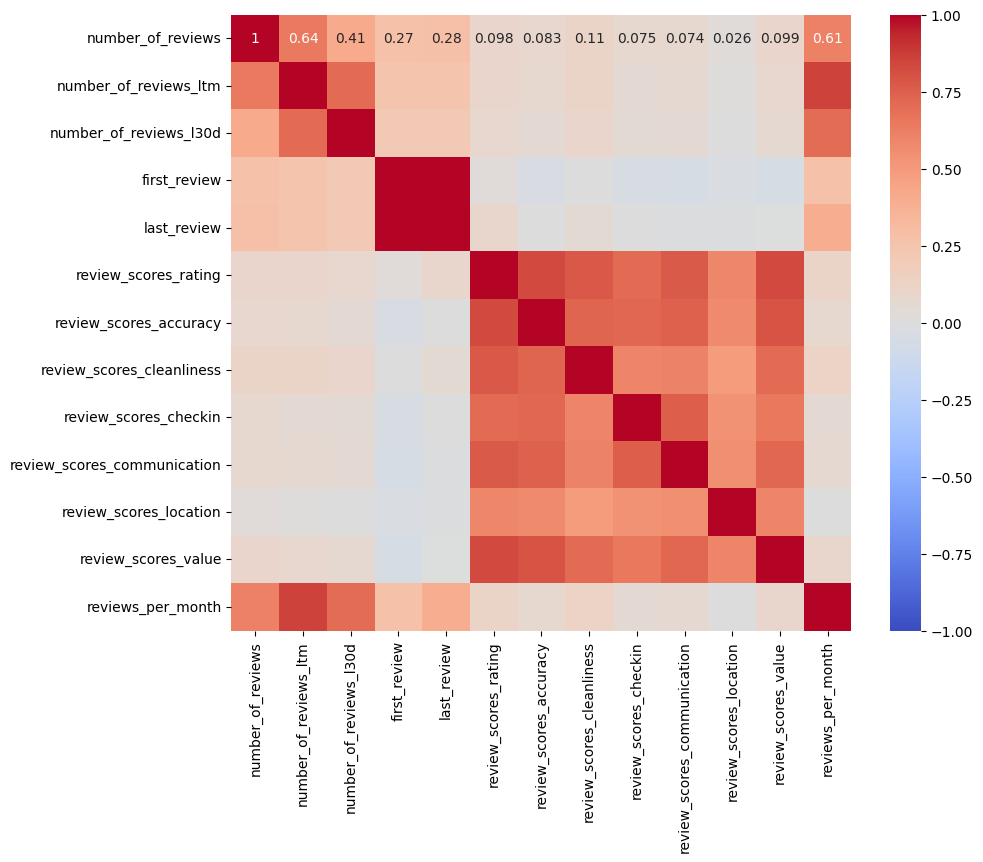

In [36]:
#listings_reviews['first_review'] = pd.to_datetime(listings_reviews['first_review'])
#listings_reviews['last_review'] = pd.to_datetime(listings_reviews['last_review'])




# Plot a heatmap of the correlation matrix
correlation_matrix = listings_reviews.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
 

In [31]:
listings_reviews.to_csv("review_features.csv", index=False)